In [6]:
# Install required packages
%pip install librosa numpy matplotlib

import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

class SimpleMusicEmotion:
    def __init__(self):
        # Define emotion categories
        self.emotions = ['happy', 'sad', 'energetic', 'calm', 'angry']
    
    def extract_features(self, audio_path):
        try:
            print("Loading audio file...")
            # Load audio file
            y, sr = librosa.load(audio_path, duration=30)  # Load first 30 seconds
            
            # Display audio player in notebook
            print("\nAudio Player:")
            ipd.display(ipd.Audio(y, rate=sr))
            
            print("\nExtracting features...")
            # Extract various features
            tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
            spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
            spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
            zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]
            
            # Calculate energy (convert to float for consistent formatting)
            energy = float(np.sum(np.abs(y)**2) / len(y))
            
            # Plot waveform
            plt.figure(figsize=(12, 4))
            plt.plot(y)
            plt.title('Waveform')
            plt.xlabel('Sample')
            plt.ylabel('Amplitude')
            plt.show()
            
            # Calculate mel spectrogram
            mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
            mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
            
            # Plot mel spectrogram
            plt.figure(figsize=(12, 4))
            librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Mel Spectrogram')
            plt.show()
            
            # Convert numpy values to float for consistent formatting
            features = {
                'tempo': float(tempo),
                'spectral_centroid_mean': float(np.mean(spectral_centroids)),
                'spectral_rolloff_mean': float(np.mean(spectral_rolloff)),
                'zero_crossing_rate_mean': float(np.mean(zero_crossing_rate)),
                'energy': energy
            }
            
            return features
            
        except Exception as e:
            print(f"Error processing audio file: {str(e)}")
            return None
    
    def predict_emotion(self, audio_path):
        # Extract features
        features = self.extract_features(audio_path)
        
        if features is None:
            return "Error analyzing audio"
        
        print("\nAnalyzed features:")
        for feature, value in features.items():
            print(f"{feature}: {value:.4f}")
        
        # Rule-based classification based on audio features
        if features['tempo'] > 150 and features['energy'] > 0.1:
            return 'energetic'
        elif features['tempo'] > 130 and features['spectral_centroid_mean'] > 2000:
            return 'happy'
        elif features['tempo'] < 100 and features['energy'] < 0.05:
            return 'sad'
        elif features['zero_crossing_rate_mean'] > 0.1 and features['energy'] > 0.15:
            return 'angry'
        else:
            return 'calm'

def analyze_song(file_path):
    try:
        # Initialize the analyzer
        emotion_predictor = SimpleMusicEmotion()
        
        # Predict emotion for the song
        print("Starting analysis...")
        emotion = emotion_predictor.predict_emotion(file_path)
        print(f"\nPredicted emotion for the song: {emotion}")
        
        return emotion
        
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        return None


# Example usage (in a separate cell)
"""
# Replace with your audio file path
song_path = "die_with_a_smile.mp3"
predicted_emotion = analyze_song(song_path)
"""

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


'\n# Replace with your audio file path\nsong_path = "die_with_a_smile.mp3"\npredicted_emotion = analyze_song(song_path)\n'

Starting analysis...
Loading audio file...

Audio Player:



Extracting features...


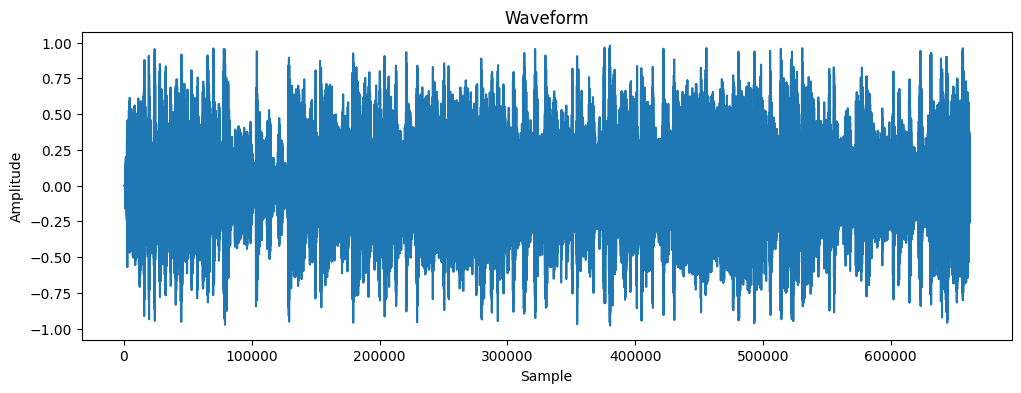

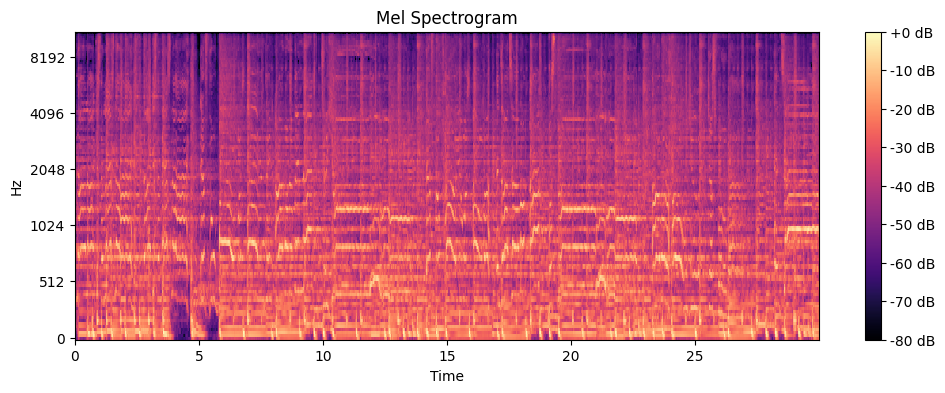


Analyzed features:
tempo: 161.4990
spectral_centroid_mean: 2337.7507
spectral_rolloff_mean: 5044.7028
zero_crossing_rate_mean: 0.1038
energy: 0.0469

Predicted emotion for the song: happy


In [7]:
song_path = "song.mp3"
predicted_emotion = analyze_song(song_path)